In [ ]:
# Kod dla wykresu z lotniskami z największą liczbą odlotów i przylotów

In [1]:
import pandas as pd 
import numpy as np
from util.getData import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dfDep = getData(["Origin", "Dest"])
dfArr = getData(["Origin", "Dest"])

In [3]:
dfAirports = getAirports()
dfAirports = dfAirports[["iata", "airport"]]

In [4]:
dfDep["Departures"] = dfDep.groupby("Origin")["Origin"].transform("count")
dfArr["Arrivals"] = dfArr.groupby("Dest")["Dest"].transform("count")
dfDep2 = dfDep[["Origin", "Departures"]]
dfArr2 = dfArr[["Dest", "Arrivals"]]

In [5]:
dfDep2 = dfDep2.drop_duplicates()
dfArr2 = dfArr2.drop_duplicates()

In [6]:
dfDep2 = dfDep2.sort_values("Departures", ascending=False).head(10)
dfArr2 = dfArr2.sort_values("Arrivals", ascending=False).head(10)

print(dfDep2)
print(dfArr2)

      Origin  Departures
15187    ORD     6365070
22119    ATL     5823454
16439    DFW     5522740
95       LAX     3946884
111      PHX     3361073
13847    DEN     3156846
14317    DTW     2873349
18507    IAH     2761895
22507    MSP     2670366
13533    STL     2667148
      Dest  Arrivals
14659  ORD   6405594
22806  ATL   5816615
22029  DFW   5557269
111    LAX   3944759
1544   PHX   3367745
13986  DEN   3172169
18974  DTW   2891314
20014  IAH   2767348
27135  MSP   2680547
13507  STL   2678328


In [7]:
dfAirports2 = dfDep2.merge(dfArr2, left_on="Origin", right_on="Dest")
dfAirports2 = dfAirports2[["Dest", "Departures", "Arrivals"]]
dfAirports2

,Dest,Departures,Arrivals
0,ORD,6365070,6405594
1,ATL,5823454,5816615
2,DFW,5522740,5557269
3,LAX,3946884,3944759
4,PHX,3361073,3367745
5,DEN,3156846,3172169
6,DTW,2873349,2891314
7,IAH,2761895,2767348
8,MSP,2670366,2680547
9,STL,2667148,2678328


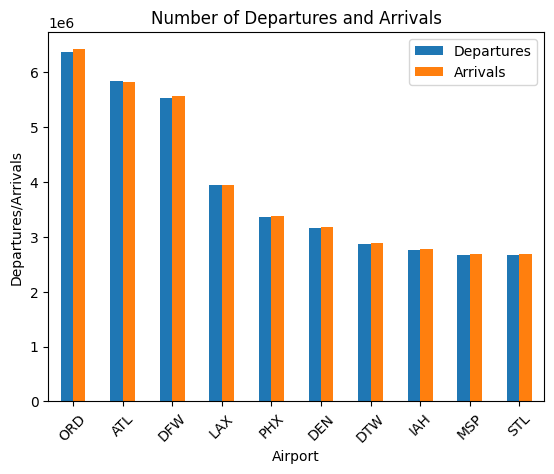

In [8]:
dfAirports2.plot(kind='bar')
plt.title("Number of Departures and Arrivals")
plt.xlabel("Airport")
plt.ylabel("Departures/Arrivals")
plt.xticks(np.arange(10), list(dfAirports2.Dest), rotation=45)
plt.show()